<a href="https://colab.research.google.com/github/dcolbourne/Colab/blob/TensorFlow/02_NeuralNetworkClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
print(tf.__version__)

2.17.1


# Introduction to nueral network classification with Tensorflow



## Creating data to view and fit

In [4]:
from sklearn.datasets import make_circles

# Make 1000 exammples
n_samples = 1000

# Create circles

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [5]:
# Check out the features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [6]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [7]:
# Visualize the data
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles


,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


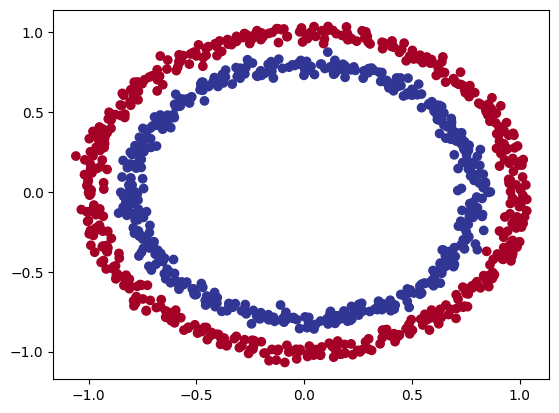

In [8]:
# Plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);


## Input and output shapes


In [9]:
# Check the shapes
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
len(X), len(y)

(1000, 1000)

In [11]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps in modeling

In [12]:
# 1. Create the model

tf.random.set_seed=42

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="softmax")
])

# 2. Compile the mdoel

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model

model_1.fit(X,
                        y,
                        epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4904 - loss: 0.6930
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4966 - loss: 0.6885  
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5207 - loss: 0.6882 
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4848 - loss: 0.6813 
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4906 - loss: 0.6779 
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4895 - loss: 0.6753 
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4874 - loss: 0.6691
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5048 - loss: 0.6683 
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4957 - loss: 0.6626
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5065 - loss: 0.6589


In [13]:
# Let's train for longer
# 1. Create the model

model_1.fit(X, y, epochs=200, verbose=0)

In [14]:
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5045 - loss: 0.0252


[0.02451348677277565, 0.5]

Our model seems to perform as if it's guessing with only % 50 accuracy

In [15]:
# 1. Create the model

tf.random.set_seed=42

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(15),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the mdoel

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model

model_2.fit(X, y, epochs=50, verbose=0)

In [16]:
# 1. Create the model

tf.random.set_seed=42

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation="relu"),
    #tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the mdoel

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model

model_3.fit(X, y, epochs=50, verbose=0)

In [17]:
# 1. Create the model

tf.random.set_seed=42

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation="relu"),
    #tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the mdoel

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model

model_4.fit(X, y, epochs=50, verbose=0)

In [18]:
# 1. Create the model

tf.random.set_seed=42

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation="relu"),
    #tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the mdoel

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model

model_5.fit(X, y, epochs=50, verbose=0)

In [19]:
# Create a function to visualize our models prediction
# Create meshgrid of the X and y values
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  Based on the following sites:
  1. https://cs231n.github.io/neural-networks-case-study/
  2. https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and creat a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,0].min() - 0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multicalss classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the descision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())



In [20]:
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4955 - loss: 0.6957


[0.6956591606140137, 0.5]

In [21]:
x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
y_min, y_max = X[:,0].min() - 0.1, X[:,1].max() + 0.1
x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1595024599098636,
 1.1360036756154805)

 31/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Doing binary classification


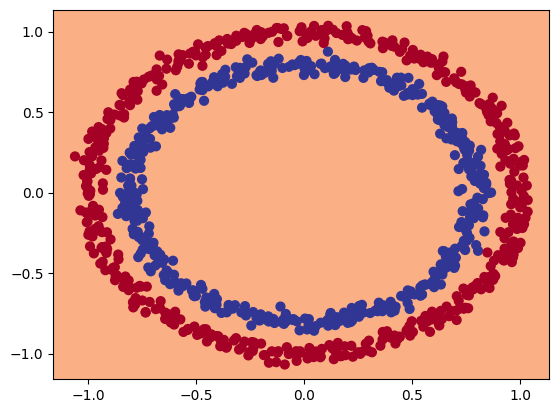

In [22]:
plot_decision_boundary(model=model_1, X=X, y=y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Doing binary classification


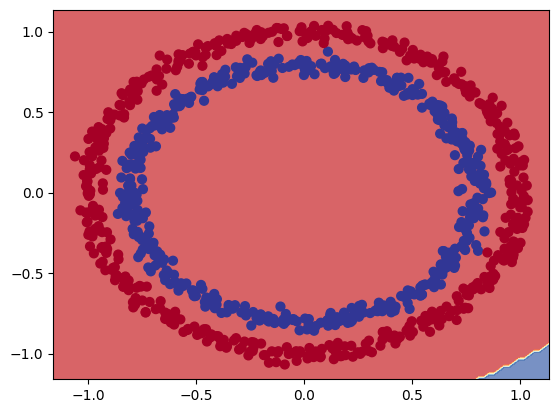

In [23]:
plot_decision_boundary(model=model_2, X=X, y=y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


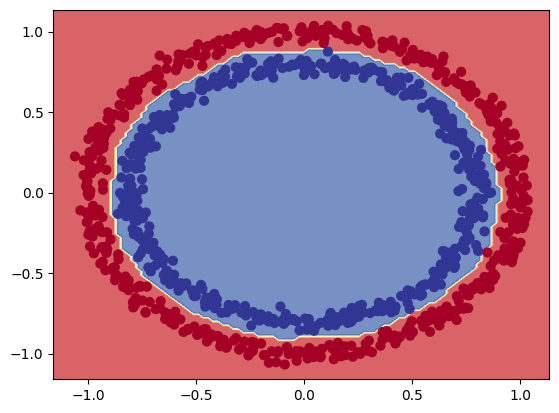

In [24]:
plot_decision_boundary(model=model_3, X=X, y=y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


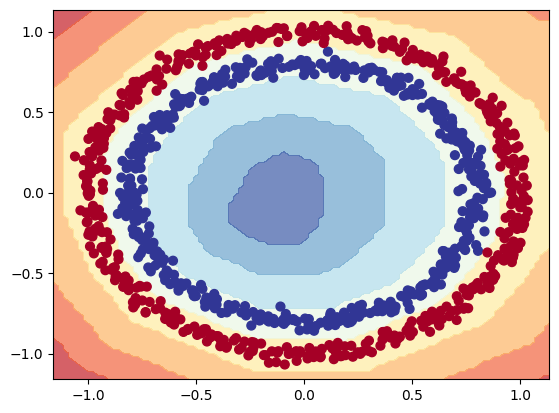

In [25]:
plot_decision_boundary(model=model_4, X=X, y=y)

### Non-linearity

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


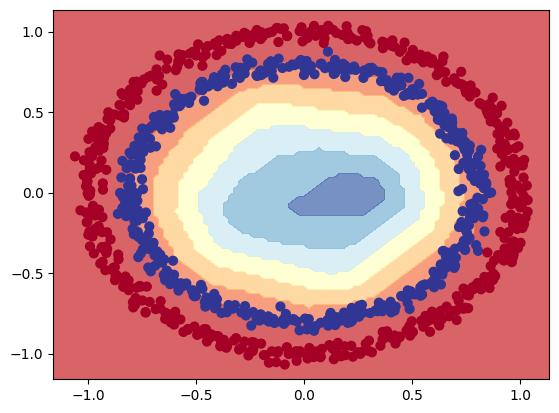

In [26]:
plot_decision_boundary(model=model_5, X=X, y=y)

In [27]:
# Create a toy tensor (similar to data we pass into our models)


A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

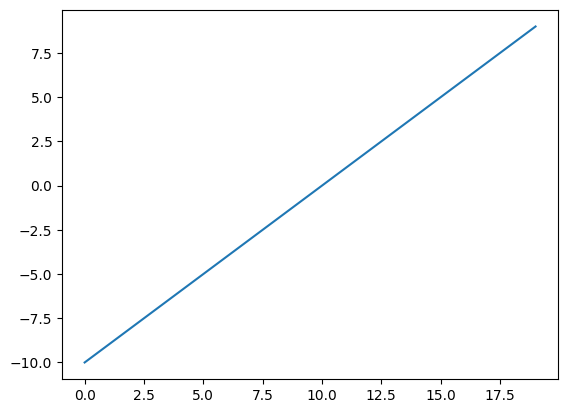

In [28]:
plt.plot(A)

In [29]:
# Let's start by replicating sigmoid > sigmoid(x) = 1 / (1 + exp(-x))

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [30]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

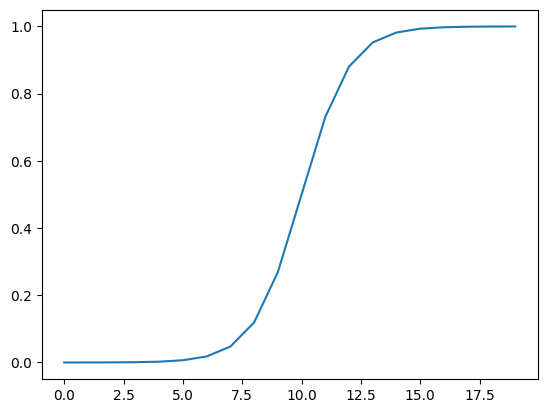

In [31]:
plt.plot(sigmoid(A))

In [32]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu funciton
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

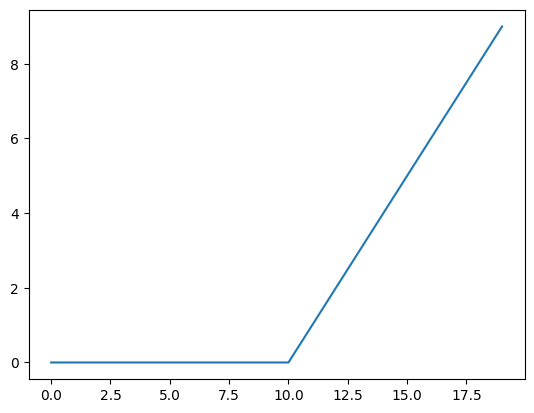

In [33]:
# Plot ReLU-modified tensor
plt.plot(relu(A))

In [34]:
tf.keras.activations.relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

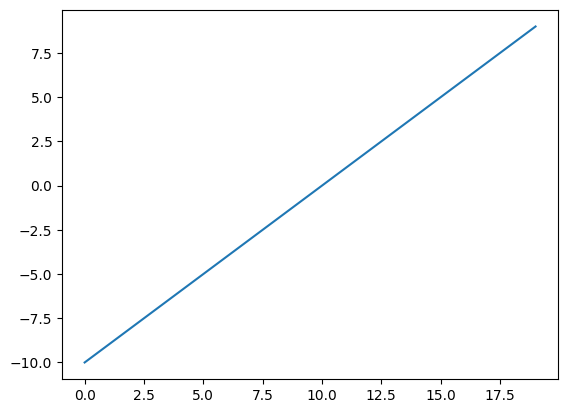

In [35]:
# Let's try a linear activation function
plt.plot(tf.keras.activations.linear(A))

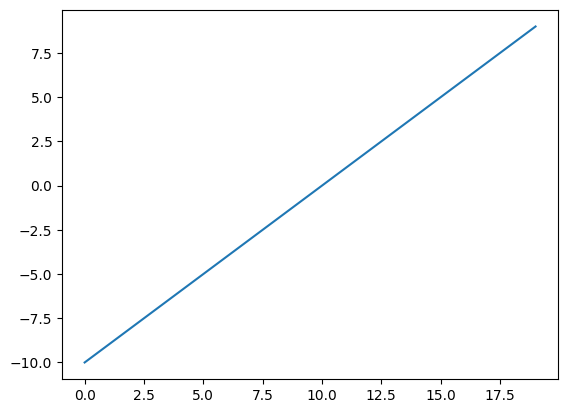

In [36]:
plt.plot(A)

In [37]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## **Machine learning activation function cheat sheet**

https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

## Evaluating and improving our classification

So far we've been testing and training on the same dataset...
This is not a good practice in ML
Let's create a training and test dataset

In [38]:
# Split our data into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [40]:
# Lets recreate a model to fit on the training data and evaluate on the testing data

# Set random seed

tf.random.set_seed=42

# 1. Create a model

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# 2. Compile the model

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics=["accuracy"])

# 3. Fit the model

history_6 = model_6.fit(X_train, y_train, epochs=25, verbose=1)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4675 - loss: 0.6999
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5633 - loss: 0.6744 
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6301 - loss: 0.6519 
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7909 - loss: 0.6144 
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8306 - loss: 0.5358 
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9269 - loss: 0.4236 
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9921 - loss: 0.2890
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9934 - loss: 0.1776 
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9966 - loss: 0.1229 
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9999 - loss: 0.0767 
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9994 - loss: 0.0553 
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.

In [41]:
model_6.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0096  


[0.008970623835921288, 1.0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


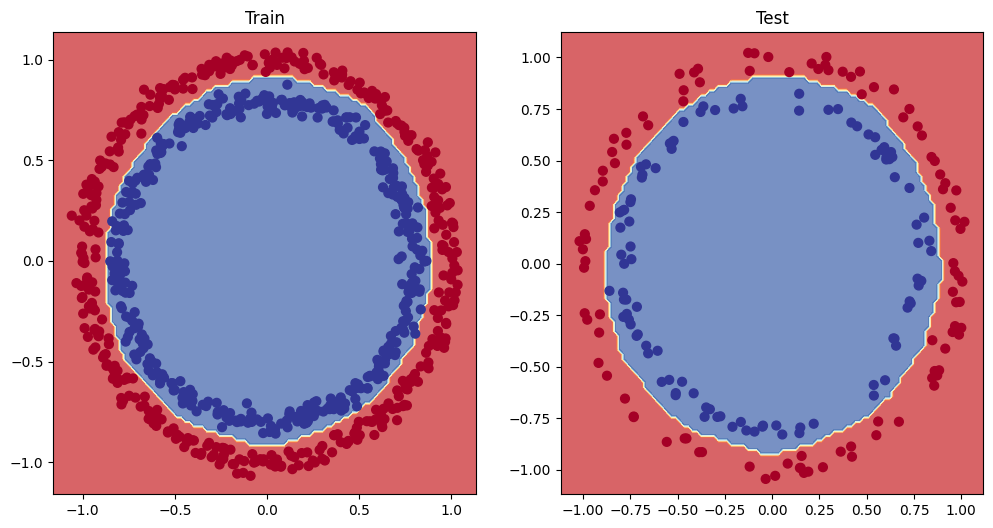

In [42]:
# Plot the decision boundaries for the training and test data sets

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_6, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_6, X=X_test, y=y_test)
plt.show();

## Plot the loss (or training) curves

In [43]:
history_6.history

{'accuracy': [0.49125000834465027,
  0.5687500238418579,
  0.6399999856948853,
  0.7774999737739563,
  0.8600000143051147,
  0.9412500262260437,
  0.9925000071525574,
  0.9862499833106995,
  0.9975000023841858,
  0.9987499713897705,
  0.9975000023841858,
  1.0,
  1.0,
  1.0,
  0.9987499713897705,
  1.0,
  1.0,
  0.9987499713897705,
  1.0,
  1.0,
  0.9987499713897705,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.6919395327568054,
  0.6732703447341919,
  0.6510285139083862,
  0.5991314053535461,
  0.5145056247711182,
  0.38412609696388245,
  0.2580065429210663,
  0.17775487899780273,
  0.11525041610002518,
  0.07178712636232376,
  0.05812862515449524,
  0.04285556823015213,
  0.037355851382017136,
  0.02885696478188038,
  0.026576494798064232,
  0.021689441055059433,
  0.018353430554270744,
  0.019798215478658676,
  0.014093813486397266,
  0.01295651774853468,
  0.014444283209741116,
  0.01119719073176384,
  0.010105100460350513,
  0.012615847401320934,
  0.01341225951910019]}

In [44]:
# Convert the history object into a dataframe
pd.DataFrame(history_6.history)

,accuracy,loss
0,0.49125,0.691940
1,0.56875,0.673270
2,0.64000,0.651029
3,0.77750,0.599131
4,0.86000,0.514506
5,0.94125,0.384126
6,0.99250,0.258007
7,0.98625,0.177755
8,0.99750,0.115250
9,0.99875,0.071787


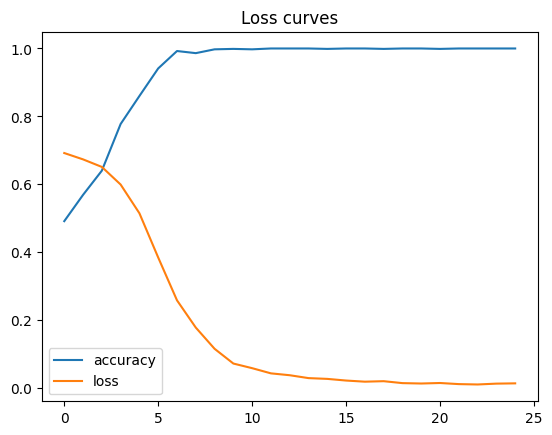

In [45]:
# Plot the loss curves
pd.DataFrame(history_6.history).plot()
plt.title("Loss curves")
plt.show()

**Note:** For many problems, the loass fuction doing down means the model is improving (the predcition it's making ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:

* A learning rate **callback** - your can think of a callback as an extra peice of functionality, you can add to your *while* it's training.
* ANother model (we could use the same ones as above, but we're practicing building models here).
* A modified loss curves plot.

In [46]:
# Set random seed
tf.random.set_seed=42

# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model

model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (paasing lr_scheduler callback)
history_7 = model_7.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler],verbose=0)

<Axes: xlabel='epochs'>

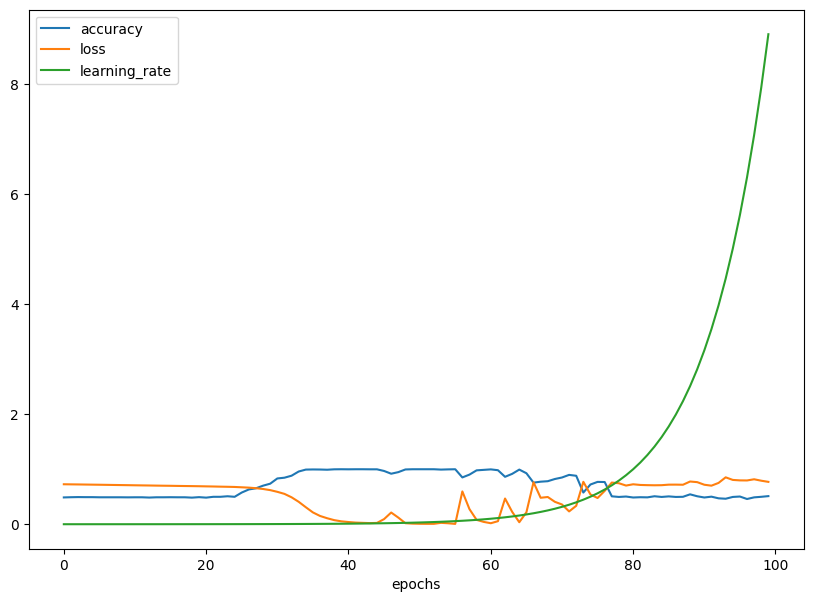

In [47]:
pd.DataFrame(history_7.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

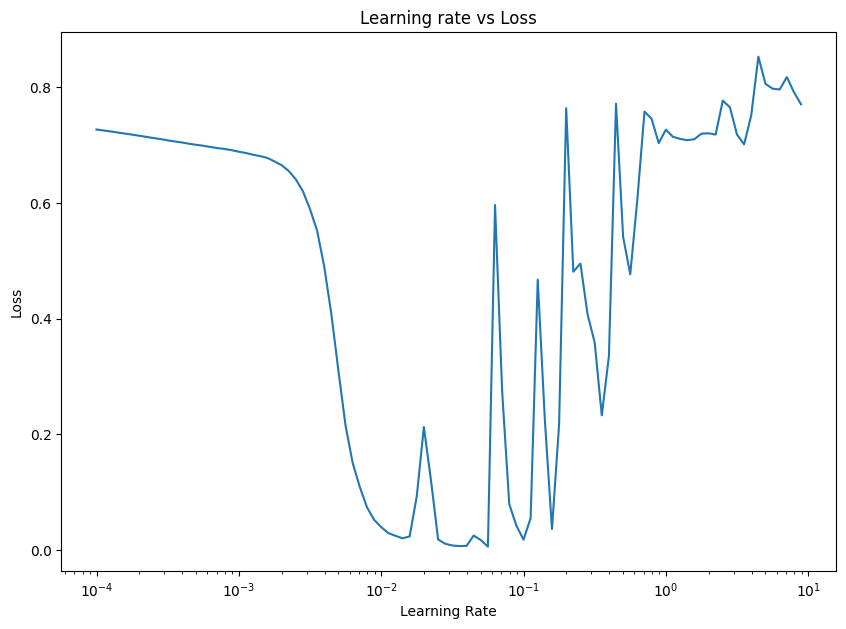

In [48]:
# Plot the learning rate verses the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_7.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

## From our graph above it looks like a learning rate of 0.022 would be a better learning rate, let's try it our next model.

In [49]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 10**-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [50]:
# Set random seed
tf.random.set_seed=42

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model

model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(.022),
                metrics=["accuracy"])

# Create a learning rate callback
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (paasing lr_scheduler callback)
history_8 = model_8.fit(X_train, y_train, epochs=100,verbose=0)

In [51]:
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0011  


[0.001444507041014731, 1.0]

<Axes: xlabel='epochs'>

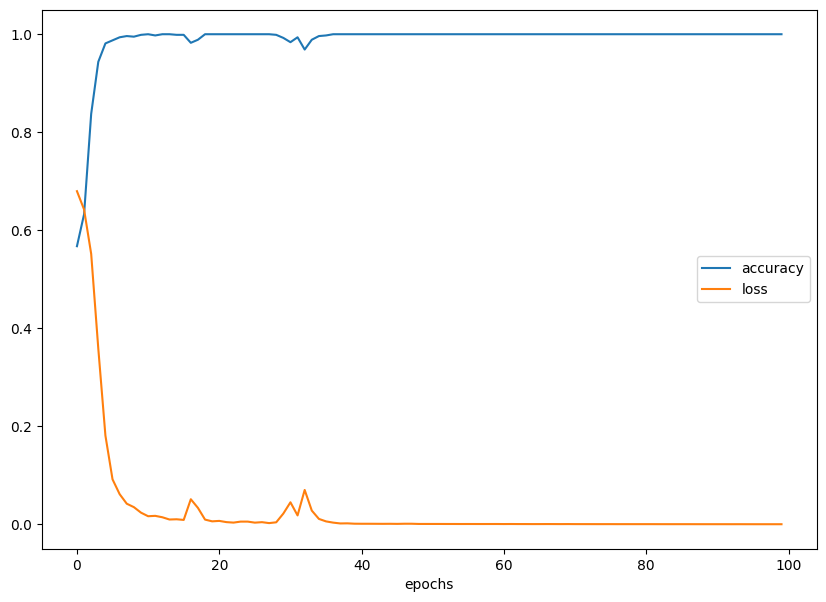

In [52]:
pd.DataFrame(history_8.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

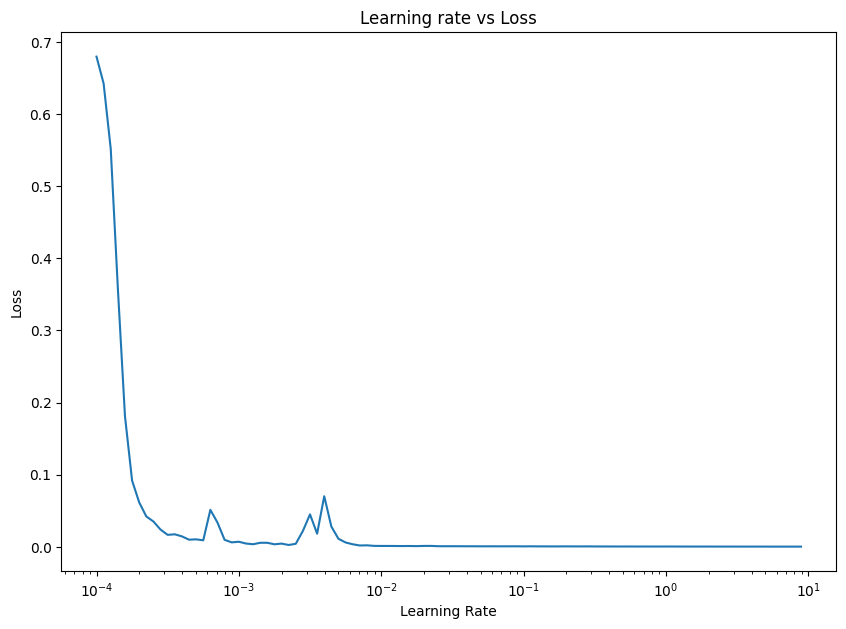

In [53]:
# Plot the learning rate verses the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_8.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


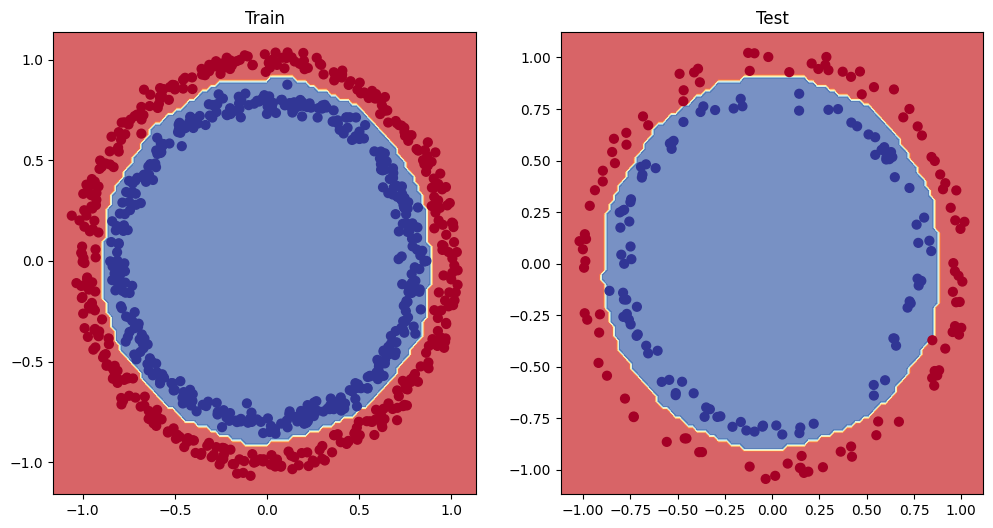

In [54]:
# Plot the decision boundaries for the training and test data sets

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model=model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model=model_8, X=X_test, y=y_test)
plt.show();

## More classification evaluation methods

Alongside visualizing our model results as much as possible, there are a handful of other classification evaulation methods & metrics you should be familiar with.
* Accuaracy
* Precision
* Recall
* F1-SCore
* Confusion matrix
* Classification report from sklearn
https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html


In [55]:
# Check the accuracy of our model
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {(loss):.3f}")
print(f"Model accuracy on the test set: {(accuracy*100):.3f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0011 
Model loss on the test set: 0.001
Model accuracy on the test set: 100.000%


How about a Confusion Matrix?

In [56]:
from sklearn.metrics import confusion_matrix

y_preds = model_8.predict(X_test)

confusion_matrix(y_test, y_preds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [57]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [58]:
y_preds[:10]

array([[9.9998152e-01],
       [1.0000000e+00],
       [9.9999851e-01],
       [9.9999982e-01],
       [4.6213930e-03],
       [3.5444493e-06],
       [9.9963868e-01],
       [7.8003941e-06],
       [9.9999988e-01],
       [2.8439592e-05]], dtype=float32)

Our predictions array has output in **prediction probability** form. The standard output from the sigmoid (or softmax) activation functions.

In [59]:
# Convert to binary format
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [60]:
from sklearn.metrics import confusion_matrix

y_preds = model_8.predict(X_test)

confusion_matrix(y_test, tf.round(y_preds))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[101,   0],
       [  0,  99]])

In [61]:
# Let make it more visually appealing

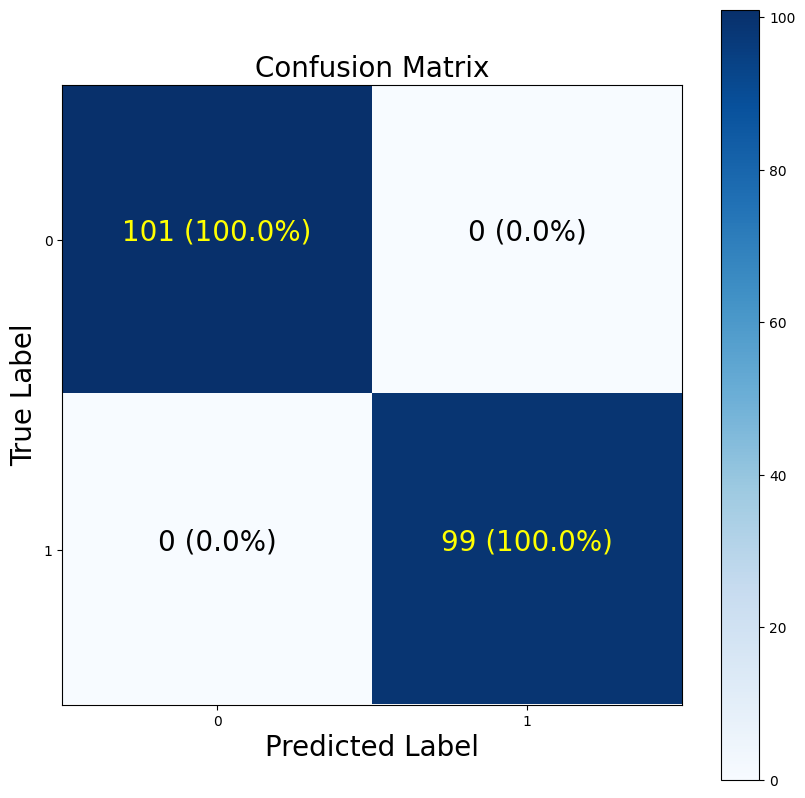

In [62]:
# This code is a mix of scikit-learn

import itertools

figsize = (10,10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's make is visually appealing
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  lables = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes

ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust the label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# set threshold for different colors
Threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="yellow" if cm[i, j] > Threshold else "black",
           size=20)





# Working with a larger example (Multiclass classification)

When you have more than two classes as an option, it's known as **multi-class calssification**.
* This means if you have 3 differnet classes, it's multi-class classification.
* It also means if you ahve 100 different classes, it's multi-class classification.

In [63]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.17.1


In [64]:
# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [65]:
# Show the first training example
print(f"Training example: \n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training example: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [66]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [67]:
# Check the shape of a single exampl
train_data[0].shape, train_labels[0].shape


((28, 28), ())

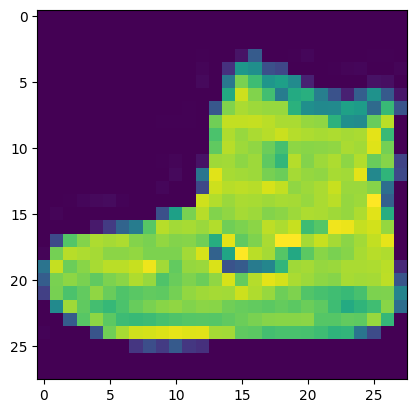

In [68]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

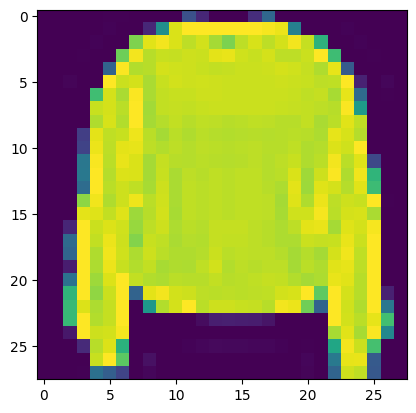

In [69]:
plt.imshow(train_data[7])

In [70]:
train_labels[7]

2

In [71]:
# Create a small list so we can index onto our training labels so they they are human read-able
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [72]:
len(class_names)

10

Text(0.5, 1.0, 'Ankle boot')

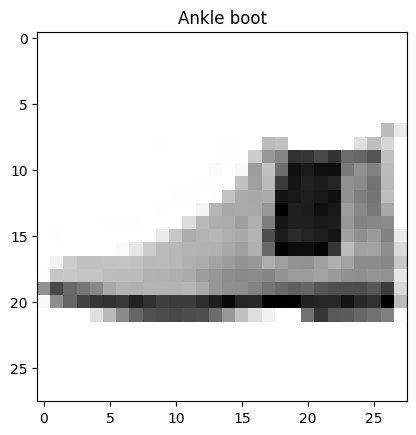

In [73]:
# Plot an example image and its label
index_of_choice = 111
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])


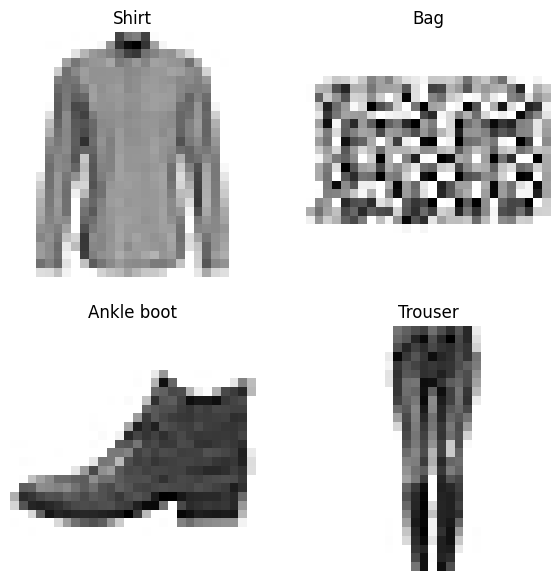

In [74]:
# Plot multiple random images of fashion mnist
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)


## Build a multi-class classification model

We can use a similar model of the binary classifiaction model that we used earlier but we'll have to modify some features


In [75]:
# Our data needs ot be flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(None, 784)

In [76]:
# 1. Create the model

tf.random.set_seed=42

model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model

model_10.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_10.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1013 - loss: 2.7419 - val_accuracy: 0.1000 - val_loss: 2.3038
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0957 - loss: 2.3028 - val_accuracy: 0.1001 - val_loss: 2.3025
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.0975 - loss: 2.3028 - val_accuracy: 0.1001 - val_loss: 2.3025
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0989 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3025
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1020 - loss: 2.3027 - val_accuracy: 0.1001 - val_loss: 2.3025
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.1009 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3025
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0965 - loss: 2.3028 - val_accuracy: 0.1001 - val_loss: 2.3025
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0996 - loss: 2.3027 -

In [77]:
# 1. Create the model

tf.random.set_seed=42

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model

model_11.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history_1 = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2439 - loss: 3.7329 - val_accuracy: 0.3023 - val_loss: 1.6571
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3291 - loss: 1.5965 - val_accuracy: 0.3642 - val_loss: 1.5158
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3615 - loss: 1.5023 - val_accuracy: 0.3919 - val_loss: 1.4451
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.4212 - loss: 1.3916 - val_accuracy: 0.4394 - val_loss: 1.3316
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4596 - loss: 1.2600 - val_accuracy: 0.4798 - val_loss: 1.2154
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5012 - loss: 1.1861 - val_accuracy: 0.5192 - val_loss: 1.1377
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.5378 - loss: 1.1057 - val_accuracy: 0.5556 - val_loss: 1.1071
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.5533 - loss: 1.080

# If your labels are interger use SparseCategoricalCressentropy or use one_hot on your labels and then you can use CategoricalCrossentropy

In [78]:
model_11.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 15)                  │          11,775 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,137 (141.16 KB)

 Trainable params: 12,045 (47.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,092 (94.11 KB)

In [79]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like the numbers in the tensors between 0 & 1


In [80]:
train_data_norm = train_data / 255.
test_data_norm = test_data / 255.

In [81]:
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [82]:
# 1. Create the model

tf.random.set_seed=42

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model

model_12.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6820 - loss: 0.9444 - val_accuracy: 0.8163 - val_loss: 0.5294
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8365 - loss: 0.4769 - val_accuracy: 0.8336 - val_loss: 0.4738
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8504 - loss: 0.4310 - val_accuracy: 0.8412 - val_loss: 0.4648
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8576 - loss: 0.4052 - val_accuracy: 0.8454 - val_loss: 0.4455
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8619 - loss: 0.3874 - val_accuracy: 0.8509 - val_loss: 0.4282
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8636 - loss: 0.3847 - val_accuracy: 0.8507 - val_loss: 0.4286
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8670 - loss: 0.3712 - val_accuracy: 0.8534 - val_loss: 0.4185
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8667 - loss: 0.3697 

<Axes: title={'center': 'Normalized data'}>

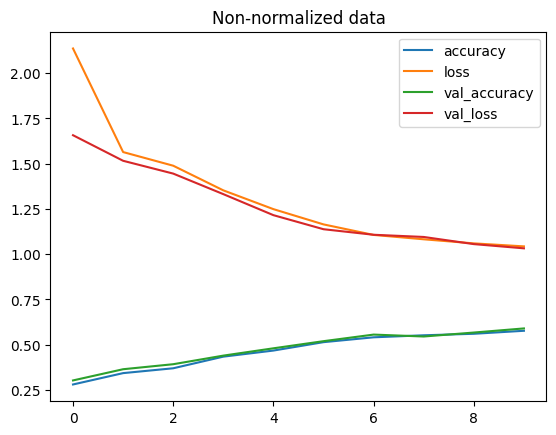

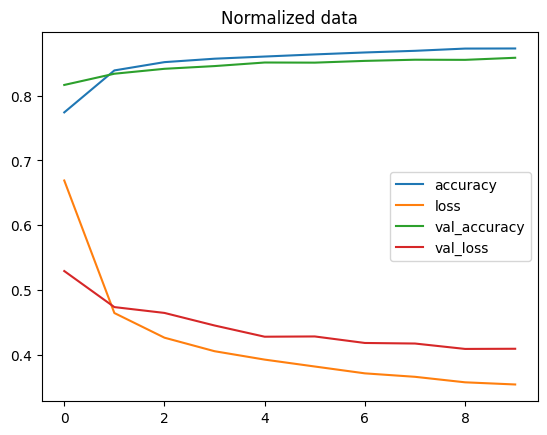

In [83]:
import pandas as pd
# Plot the non-normalized data lsos curves
pd.DataFrame(non_norm_history_1.history).plot(title="Non-normalized data")
# Plot normalized datta loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

## Finding the ideal learning rate

In [84]:
# Set the random seed
tf.random.set_seed=42

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model

model_13.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                                train_labels,
                                epochs=40,
                                validation_data=(test_data_norm, test_labels),
                                callbacks=[lr_scheduler])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4472 - loss: 1.6748 - val_accuracy: 0.7239 - val_loss: 0.8147 - learning_rate: 1.0000e-04
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7553 - loss: 0.7394 - val_accuracy: 0.7900 - val_loss: 0.6363 - learning_rate: 1.1220e-04
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8003 - loss: 0.5993 - val_accuracy: 0.8084 - val_loss: 0.5671 - learning_rate: 1.2589e-04
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8184 - loss: 0.5394 - val_accuracy: 0.8187 - val_loss: 0.5322 - learning_rate: 1.4125e-04
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8284 - loss: 0.5026 - val_accuracy: 0.8237 - val_loss: 0.5091 - learning_rate: 1.5849e-04
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8329 - loss: 0.4806 - val_accuracy: 0.8277 - val_loss: 0.4919 - learning_rate: 1.7783e-04
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/s

Text(0.5, 1.0, 'Learning rate vs Loss')

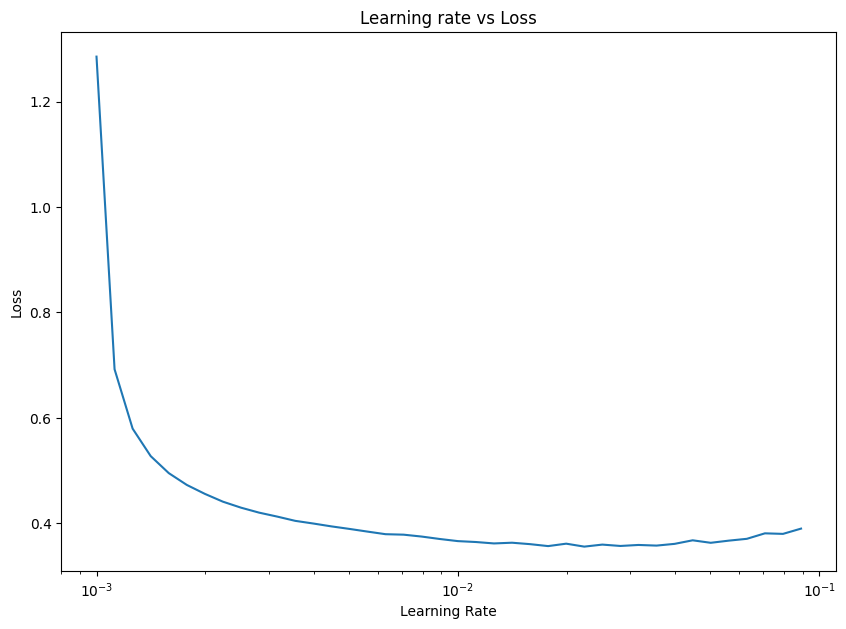

In [85]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (tf.range(40)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [86]:
10**-3

0.001

In [87]:
# Set the random seed
tf.random.set_seed=42

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(150, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model

model_14.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(0.00075),
                 metrics=["accuracy"])

# Create the learning rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
find_lr_history_1 = model_14.fit(train_data_norm,
                                train_labels,
                                epochs=25,
                                validation_data=(test_data_norm, test_labels),
                                callbacks=[lr_scheduler])

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7098 - loss: 0.9228 - val_accuracy: 0.8244 - val_loss: 0.4975 - learning_rate: 1.0000e-04
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8432 - loss: 0.4519 - val_accuracy: 0.8422 - val_loss: 0.4514 - learning_rate: 1.1220e-04
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8591 - loss: 0.4021 - val_accuracy: 0.8569 - val_loss: 0.4061 - learning_rate: 1.2589e-04
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8689 - loss: 0.3718 - val_accuracy: 0.8634 - val_loss: 0.3890 - learning_rate: 1.4125e-04
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8763 - loss: 0.3500 - val_accuracy: 0.8636 - val_loss: 0.3811 - learning_rate: 1.5849e-04
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8834 - loss: 0.3292 - val_accuracy: 0.8669 - val_loss: 0.3704 - learning_rate: 1.7783e-04
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5m

Text(0.5, 1.0, 'Learning rate vs Loss')

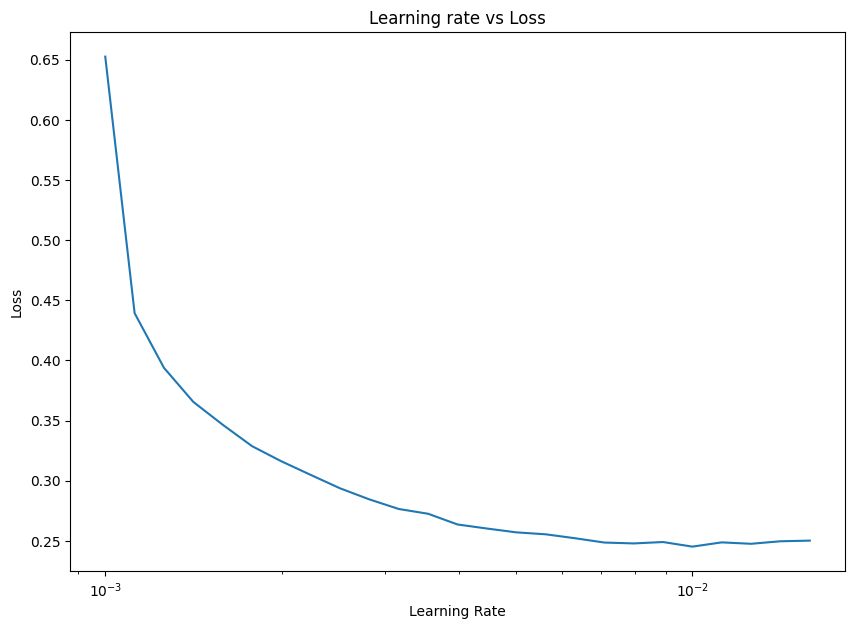

In [88]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 ** (tf.range(25)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, find_lr_history_1.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:

* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its redults (by training it for longer or changing the atchitecture)
* Save and export it for use in an application

Let's go through the top 2...

In [167]:
# Create a confusion matrix function

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=10):

  figsize = (10,10)

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's make is visually appealing
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues_r)
  fig.colorbar(cax)

  # Set lables to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust the label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # set threshold for different colors
  Threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="black" if cm[i, j] > Threshold else "white",
            size=6)





In [92]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [142]:
# Makes some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for "prediction probabilities"
y_probs[:6]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[3.0649217e-06, 3.7702126e-08, 2.3893637e-08, 2.2158346e-07,
        3.1238025e-09, 3.4422366e-04, 7.1516502e-07, 3.3771280e-02,
        1.4734890e-07, 9.6588039e-01],
       [2.8407069e-06, 6.5023133e-17, 9.9935263e-01, 8.6544851e-12,
        2.9584335e-05, 1.6787720e-17, 6.1492808e-04, 1.3485366e-22,
        2.3756115e-14, 2.4127409e-18],
       [3.9471604e-09, 9.9999994e-01, 5.3691247e-13, 9.0443775e-10,
        1.0688626e-11, 3.4868637e-18, 8.0549331e-11, 3.2582894e-14,
        1.7349623e-14, 3.5682356e-16],
       [9.1757206e-09, 9.9999946e-01, 6.5752542e-12, 4.5792819e-07,
        7.2655527e-11, 2.2938443e-17, 2.6448213e-09, 2.7367618e-13,
        3.7742793e-13, 8.5688021e-15],
       [4.5675371e-02, 9.1453369e-09, 3.7922122e-02, 3.3003520e-03,
        5.0563044e-03, 2.8655677e-07, 9.0802634e-01, 1.4466049e-09,
        1.9407476e-05, 6.6993371e-09],
       [1.7013861e-05, 9.9998027e-01, 1.0420961e-08, 2.1358803e-06,
        1.9044418e-08, 7.1709750e-13, 5.0463410e-07, 1.59

In [102]:
y_probs[0]

array([3.0649217e-06, 3.7702126e-08, 2.3893637e-08, 2.2158346e-07,
       3.1238025e-09, 3.4422366e-04, 7.1516502e-07, 3.3771280e-02,
       1.4734890e-07, 9.6588039e-01], dtype=float32)

In [103]:
# Convert all prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [104]:
y_preds[:10] == test_labels[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[741,   4,  27,  82,   2,   2, 135,   0,   6,   1],
       [  0, 976,   4,  15,   2,   0,   3,   0,   0,   0],
       [  5,   1, 807,  11,  57,   0, 114,   0,   5,   0],
       [  7,  11,  27, 894,  32,   0,  25,   0,   4,   0],
       [  0,   1, 144,  36, 711,   0, 107,   0,   1,   0],
       [  0,   0,   0,   1,   0, 936,   0,  26,   3,  34],
       [ 91,   1,  61,  50,  43,   0, 748,   0,   6,   0],
       [  0,   0,   0,   0,   0,   7,   0, 969,   0,  24],
       [  5,   0,   6,   4,   4,   3,   7,   2, 969,   0],
       [  0,   0,   0,   0,   0,   7,   1,  36,   0, 956]])

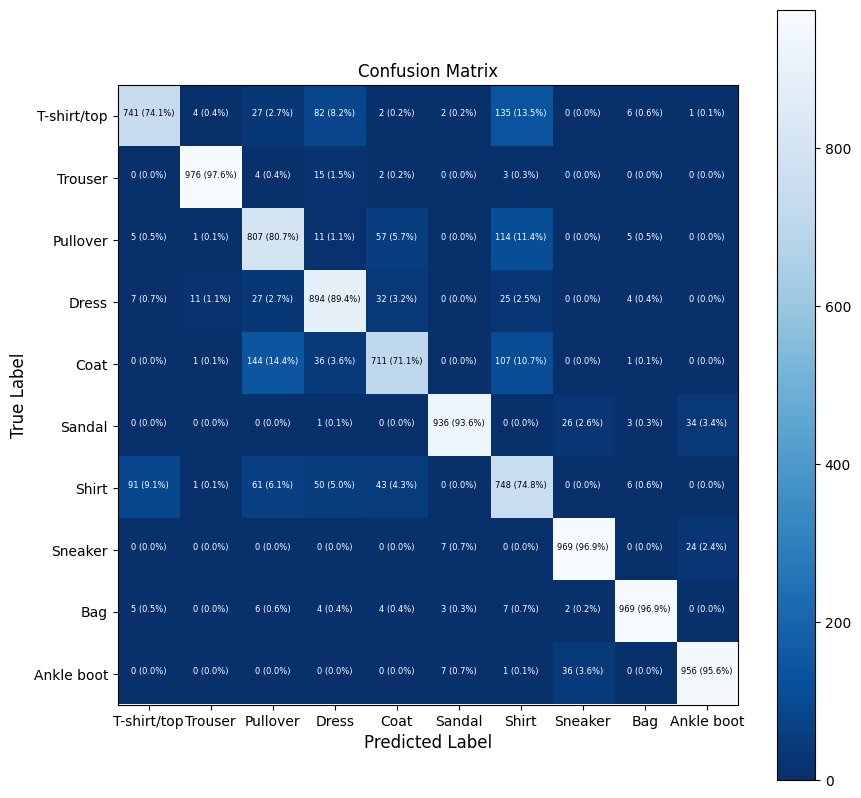

In [168]:
# Make a better confusion matrix

make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(10,10),
                      text_size=12)

# Visualize, Visualize, Visualize

Let's create a function for:
* Plot a random image
* Make a prediction on the image
* Label the plot with the truth label & the predicted label


In [176]:
import random

def plot_random_image(model, images, truth_labels, classes):
  """
  Picks a rondom image, plots it and labels it with a prediction and a truth label.
  """
  # Set up a random integer
  i = random.randint(0, len(images))

  # Create predicitions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[truth_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("pred: {} {:2.0f}% (True: {})".format(pred_label,
            100*tf.reduce_max(pred_probs),
            true_label),
            color=color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


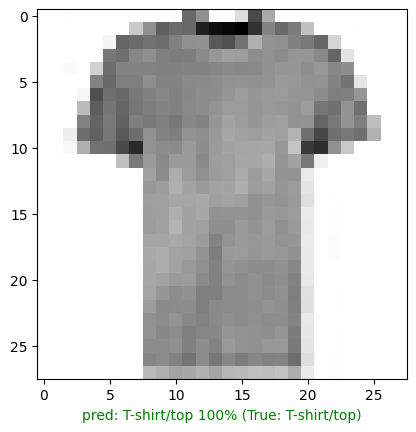

In [219]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,
                  truth_labels=test_labels,
                  classes=class_names)